## Lesson 8 : Convolution networks

### But FIRST - finish up Collaborative filtering!

I included notes on the rest of Chapter 8  in the previous lesson because I had no idea he was going to continue on in this lesson. 

For reference he goes over:

* Creating your own embedding layer

* Intepreting embeddings and biases 

* Using fastai's `collab_learner` implementation

* Embedding distances 

* Deep learning for collab filtering


### Embeddings for NLP (30:30)

* Discussion of how embeddings are used words, which are just a large categorical variable (the vocab)

* The neural net only sees the embeddings, which it learns.


### Embeddings for Tabular

* As mentioned (i think?) before we can also turn any categorical into an embedding, for example those that often appear in tabular data. 

* This is done in chapter 9 in the book.

* Guo, Cheng, and Felix Berkhahn. 2016. “Entity Embeddings of Categorical Variables.” arXiv. https://doi.org/10.48550/arXiv.1604.06737.

* Guo et. al. also combined deep learning embeddings with boosted trees (i.e. also feeding the embeddings into decision tree)


### CNNS

Video at 44:30

* Based partly on Chapter 13 in the book.


#### Convolutions and pooling
* First he presents convolutions in excel.  Mentions that MaxPooling is not as common and modern visual learners use stride > 1 (typically 2?) and average pooling at the end. 

* Fastai uses "Concat pooling" and concatenates the average and max pooling layers at the end.

* Points out that a convolution layer is really just a matrix multiplication: 
   * Flatten the input into a vector
   * Now the convolution can be written as a matrix multiplying the vector, except that the is constrained: Many of the weights are zero, and the rest are shared.
   * This is shown in Chapter 13 of the book.


####  Dropout layers

* Shows how dropout works in excel, corrupting the activations randomly for each batch. 

* This is a regularization technique that helps prevent overfitting.

* The idea is that a human can look at the corrupted image and still see what it was, and a neural net should be able to as well. This forces the model to the learn the representation and not just memorize the data (overfitting).


#### Activation functions

* Pretty much any nonlinearity can be used as an activation function.

* ReLU is the most common these days as it is fast, but others are commonly used as well.. tanh, sigmoid, etc.



## WHAT NOW? 

*  Write - Code, papers, blog posts, etc.

* Help - Forums, StackOverflow, etc.

* Gather - Book clubs, meetups, study groups

* Build - Apps, Work Projects, Libraries

* Go on to part too!

### Chapter 13

* The book and the lecutre overlap quite a bit in concept.

* The book however also gives some pytorch examples of setting up a CNN for MNIST

* Although I have done this before, I think I will reproduce it here:

In [1]:
import torch 
import torch.nn as nn
import torch.functional as F




In [2]:
# import MNIST dataset
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_path = './data'
mnist = datasets.MNIST(data_path, train=True, download=True, transform=transforms.ToTensor())

first image is a 1


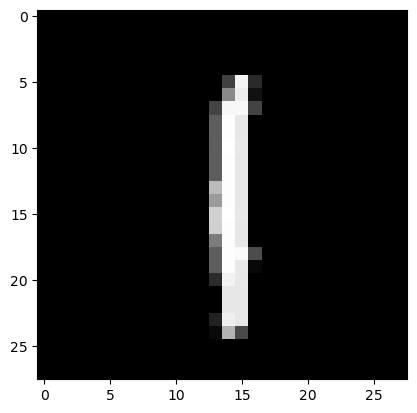

In [3]:
# load data
data_loader = DataLoader(mnist, batch_size=32, shuffle=True)

# pull in a sample image
data_iter = iter(data_loader)
images, labels = next(data_iter)
print(f"first image is a {labels[0]}")
# plot the fist image
import matplotlib.pyplot as plt
plt.imshow(images[0].numpy().squeeze(), cmap='gray')

In [4]:
images[0].mean(), images[0].std()

(tensor(0.0552), tensor(0.2099))

Ok lets build a simple model to classify MNIST digits using a CNN.

In [5]:
# Simple CNN using stride of 2 to downsample until we reach 1x1

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=5, stride=2, padding=2)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.fc = nn.Linear(128, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = torch.relu(self.conv4(x))
        x = torch.relu(self.conv5(x))
        #print(x.shape)
        x = x.view(-1, 128)
        
        x = self.fc(x)
        return x

In [6]:
# simple training loop
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(3):
    for i, (images, labels) in enumerate(data_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 200 == 0:
            print(f"epoch {epoch}, step {i}, loss {loss.item()}")

epoch 0, step 0, loss 2.305475950241089
epoch 0, step 200, loss 0.25896552205085754
epoch 0, step 400, loss 0.27249205112457275
epoch 0, step 600, loss 0.28360241651535034
epoch 0, step 800, loss 0.06841063499450684
epoch 0, step 1000, loss 0.08443564176559448
epoch 0, step 1200, loss 0.17739680409431458
epoch 0, step 1400, loss 0.12683258950710297
epoch 0, step 1600, loss 0.006997918244451284
epoch 0, step 1800, loss 0.032063864171504974
epoch 1, step 0, loss 0.06199393421411514
epoch 1, step 200, loss 0.6179267764091492
epoch 1, step 400, loss 0.027582760900259018
epoch 1, step 600, loss 0.33608707785606384
epoch 1, step 800, loss 0.06355296820402145
epoch 1, step 1000, loss 0.02192552201449871
epoch 1, step 1200, loss 0.015187246724963188
epoch 1, step 1400, loss 0.16267578303813934
epoch 1, step 1600, loss 0.08299534767866135
epoch 1, step 1800, loss 0.041382864117622375
epoch 2, step 0, loss 0.07754803448915482
epoch 2, step 200, loss 0.11842463910579681
epoch 2, step 400, loss 0.

Note that in the text the final convolution maps from 64 to 10 channels so there is no need for a final linear layer. Here instead i map to 128 channels and then use a linear layer to map to 10 classes..  THis maybe why my peformance was better withoout having to introduce batch normalization layers. 

## Validation

Note that, like in the text, I am using the test data for validation. The better way to do this to split the training data into a training and validation set, and save this test set for the final evaluation.  

In [7]:
# load test data
mnist_test = datasets.MNIST(data_path, train=False, download=True, transform=transforms.ToTensor())

In [10]:
test_loader = DataLoader(mnist_test, batch_size=32)
correct = sum((torch.argmax(model(images), dim=1) == labels).sum().item() 
              for images, labels in test_loader)
total = len(mnist_test)
print(f"accuracy: {correct / total}")

accuracy: 0.9807


Note that in the text the final convolution maps from 64 to 10 channels so there is no need for a final linear layer. Here instead i map to 128 channels and then use a linear layer to map to 10 classes..  THis maybe why my peformance was better withoout having to introduce batch normalization layers.   Another difference is that I use Adam as the optimizer, rather then SGD with the 1cycle policy.   Adam seems to work well here, and so far I cannot see how to use the 1cycle policy in pytorh *within* epochs.  It seems pytorch only directly supports lr changes between epochs, but this will require further investigation.

I will note that Fastai "Learner" is quite flexible and can also take 'callbacks' much like Keras to monitor the activations and other things.  Of course this can be done without callbacks since in bare pytorch we have direct control over the training loop. 

As an example, lets look at the mean and std of the activations in the third layer of the model.  This is a common way to monitor the training process.

In [18]:
 # Yeah this is a copy paste.. 
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

conv3_means = []
conv3_std = []
conv3_percent_near_zero = []

for epoch in range(3):
    for i, (images, labels) in enumerate(data_loader):
        optimizer.zero_grad()
        outputs = model(images)
        conv3_means.append(model.conv3.weight.data.mean().item())
        conv3_std.append(model.conv3.weight.data.std().item())
        conv3_percent_near_zero.append((model.conv3.weight.data < 0.01).float().mean().item())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 200 == 0:
            print(f"epoch {epoch}, step {i}, loss {loss.item()}")

epoch 0, step 0, loss 2.3039984703063965
epoch 0, step 200, loss 0.20402395725250244
epoch 0, step 400, loss 0.4137134253978729
epoch 0, step 600, loss 0.27653777599334717
epoch 0, step 800, loss 0.35705408453941345
epoch 0, step 1000, loss 0.13584715127944946
epoch 0, step 1200, loss 0.2048436403274536
epoch 0, step 1400, loss 0.060749221593141556
epoch 0, step 1600, loss 0.13464441895484924
epoch 0, step 1800, loss 0.08552274107933044
epoch 1, step 0, loss 0.10086961835622787
epoch 1, step 200, loss 0.19965878129005432
epoch 1, step 400, loss 0.14582683145999908
epoch 1, step 600, loss 0.016105879098176956
epoch 1, step 800, loss 0.15463870763778687
epoch 1, step 1000, loss 0.07773023843765259
epoch 1, step 1200, loss 0.07100819796323776
epoch 1, step 1400, loss 0.2576489746570587
epoch 1, step 1600, loss 0.012754198163747787
epoch 1, step 1800, loss 0.21272681653499603
epoch 2, step 0, loss 0.0332401841878891
epoch 2, step 200, loss 0.16383853554725647
epoch 2, step 400, loss 0.1143

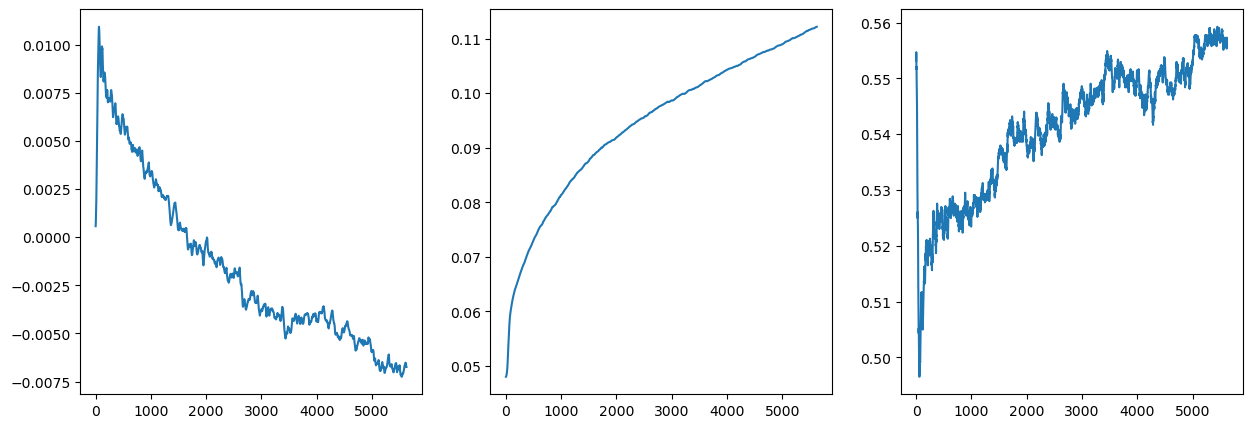

In [26]:
# plot the means and stds and percent near zero as three plots in a row:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(conv3_means, label='mean')
ax[1].plot(conv3_std, label='std')
ax[2].plot(conv3_percent_near_zero, label='percent near zero')

Note that these plots look similar to what was acheived using 1cycle. 

I skimmed over the next part that discussed another way to look at the internal activations.  This is propbably worth a closer look in the future.

### Batch Normalization

THe last section of this chapter introduced batch normalization, which helps keep the activations in the network in a good range.    Let's see if this can get us some improvement!

In [30]:
# TODO: refactor thsi to avoid duplication
class CNNwithBN(nn.Module):
    def __init__(self):
        super(CNNwithBN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=5, stride=2, padding=2)
        self.bn1 = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.fc = nn.Linear(128, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.bn1(x)
        x = torch.relu(self.conv2(x))
        x = self.bn2(x)
        x = torch.relu(self.conv3(x))
        x = self.bn3(x)
        x = torch.relu(self.conv4(x))
        x = self.bn4(x)
        x = torch.relu(self.conv5(x))
        x = self.bn5(x)
        #print(x.shape)
        x = x.view(-1, 128)
        
        x = self.fc(x)
        return x

In [31]:
 # Yeah this is a copy paste.. 
model = CNNwithBN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

conv3_means = []
conv3_std = []
conv3_percent_near_zero = []

for epoch in range(3):
    for i, (images, labels) in enumerate(data_loader):
        optimizer.zero_grad()
        outputs = model(images)
        conv3_means.append(model.conv3.weight.data.mean().item())
        conv3_std.append(model.conv3.weight.data.std().item())
        conv3_percent_near_zero.append((model.conv3.weight.data < 0.01).float().mean().item())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 200 == 0:
            print(f"epoch {epoch}, step {i}, loss {loss.item()}")

epoch 0, step 0, loss 2.400780439376831
epoch 0, step 200, loss 0.5593376159667969
epoch 0, step 400, loss 0.10239142179489136
epoch 0, step 600, loss 0.12815944850444794
epoch 0, step 800, loss 0.04855617508292198
epoch 0, step 1000, loss 0.12037348747253418
epoch 0, step 1200, loss 0.04297475516796112
epoch 0, step 1400, loss 0.05133293941617012
epoch 0, step 1600, loss 0.009313576854765415
epoch 0, step 1800, loss 0.1829746812582016
epoch 1, step 0, loss 0.1912076324224472
epoch 1, step 200, loss 0.018454160541296005
epoch 1, step 400, loss 0.038627833127975464
epoch 1, step 600, loss 0.024237997829914093
epoch 1, step 800, loss 0.07713082432746887
epoch 1, step 1000, loss 0.19939947128295898
epoch 1, step 1200, loss 0.13960257172584534
epoch 1, step 1400, loss 0.21053487062454224
epoch 1, step 1600, loss 0.03382275998592377
epoch 1, step 1800, loss 0.049592502415180206
epoch 2, step 0, loss 0.002397294621914625
epoch 2, step 200, loss 0.13420765101909637
epoch 2, step 400, loss 0.0

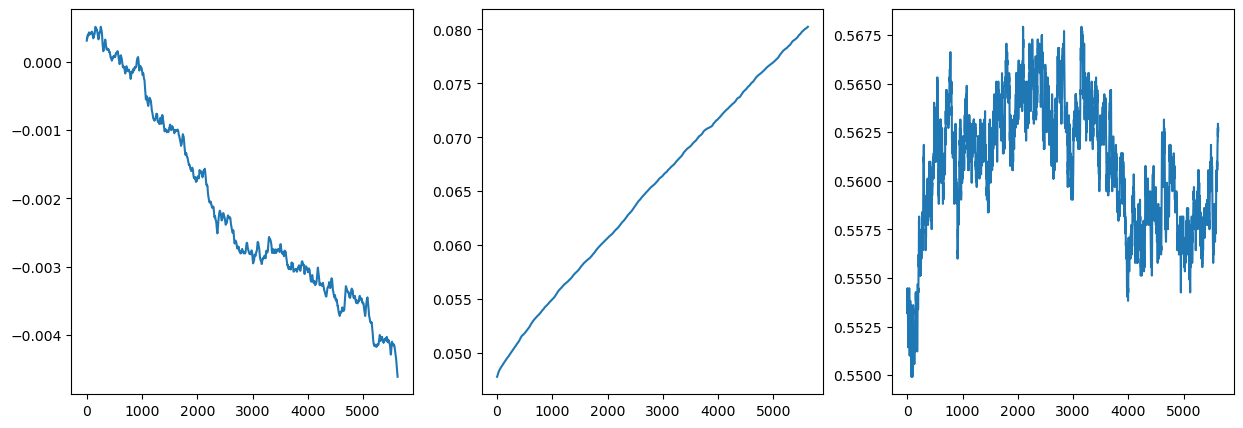

In [32]:
# plot the means and stds and percent near zero as three plots in a row:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(conv3_means, label='mean')
ax[1].plot(conv3_std, label='std')
ax[2].plot(conv3_percent_near_zero, label='percent near zero')

In [33]:
test_loader = DataLoader(mnist_test, batch_size=32)
correct = sum((torch.argmax(model(images), dim=1) == labels).sum().item() 
              for images, labels in test_loader)
total = len(mnist_test)
print(f"accuracy: {correct / total}")

accuracy: 0.983


Next steps would be to try tuning these parameters, but I am going to move on at this point. 